# Linear Dynamic Harmonic Regression (LDHR)

__Parece que los notebooks no están muy perfecionados (o mi instalación tiene problemas). Algunos comandos fallan la primera vez que se ejecutan.__

Para el filtrado (filtro de Kalman y suavizado de intervalo fijo) usaremos la toolbok [E4](https://www.ucm.es/e-4/), para ello es necesario ejecutar lo siguiente:

In [1]:
e4init


            XXXXXX 4 4      XXXXX  XX     XX  XX  XXXXXX (c)
           XX      444     XX  XX XX     XX  XX  XX
          XXXX       4    XXXXX  XX     XX  XX  XXXXXX
         XX              XX     XX     XX  XX      XX
        XXXXXX          XX     XXXXXX XXXXXX  XXXXXX

    Toolbox for State Space Estimation of Econometric Models
 
*********************** Options set by user ********************
Filter. . . . . . . . . . . . . : KALMAN
Scaled B and M matrices . . . . : NO
Initial state vector. . . . . . : AUTOMATIC SELECTION
Initial covariance of state v.  : IDEJONG
Variance or Cholesky factor?  . : VARIANCE
Optimization algorithm. . . . . : BFGS
Maximum step length . . . . . . : 0.100000
Stop tolerance. . . . . . . . . : 0.000010
Max. number of iterations . . . :       75
Verbose iterations. . . . . . . : YES
****************************************************************
 
 


Tambien es necesario cargar el toolbox de control

In [2]:
pkg load control

Cargamos los datos de la serie _"ipi"_ y la transformamos con `log`

In [3]:
load ipi.txt
log_ipi=log(ipi);

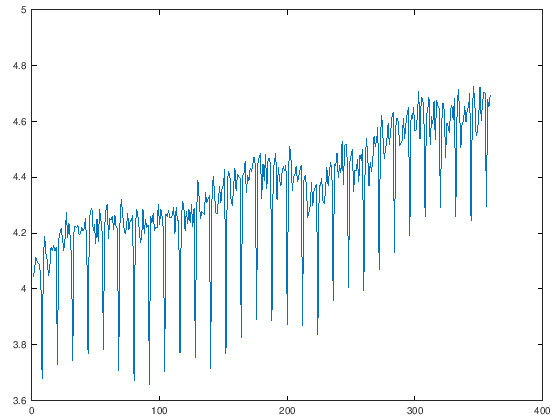

In [5]:
%plot --format png
plot(log_ipi)

In [6]:
filt=0;
PaP=12./(0:6)
TVPaP=[1 1 1 1 1 1 1;1 0 0 0 0 0 0]

PaP =

       Inf   12.0000    6.0000    4.0000    3.0000    2.4000    2.0000

TVPaP =

   1   1   1   1   1   1   1
   1   0   0   0   0   0   0



In [8]:
[VAR,P,TVP,oar]=autodhr(log_ipi,12,[],[],PaP,TVPaP)

VAR =

 Columns 1 through 6:

   4.1801e-04   2.1030e-06   3.4163e-06   1.0080e-06   4.6124e-06   1.1629e-05

 Columns 7 and 8:

   6.5676e-06   4.7243e-06

P =

       Inf   12.0000    6.0000    4.0000    3.0000    2.4000    2.0000

TVP =

   1.0000   1.0000   1.0000   1.0000   1.0000   1.0000   1.0000
   0.9255        0        0        0        0        0        0

oar = 17


In [9]:
NVR=VAR(2:8)./VAR(1)

NVR =

 Columns 1 through 6:

   5.0311e-03   8.1728e-03   2.4115e-03   1.1034e-02   2.7821e-02   1.5712e-02

 Column 7:

   1.1302e-02



In [11]:
[trend,season,cycle,irreg]=dhrfilt(log_ipi,P,TVP,VAR,12,filt);

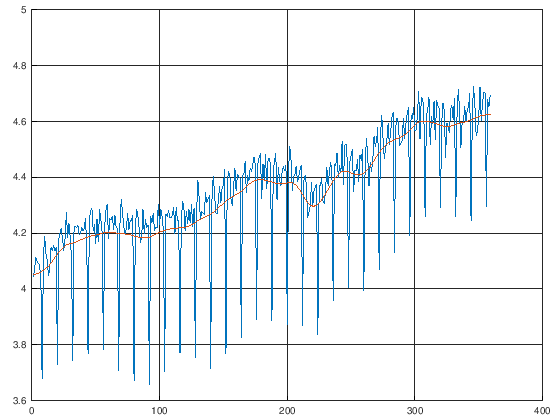

In [12]:
grid on
hold on
plot([log_ipi,trend(:,1)])

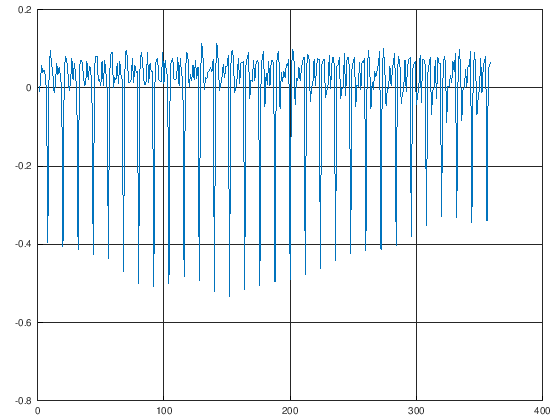

In [13]:
grid on
hold on
plot([season(:,1)])

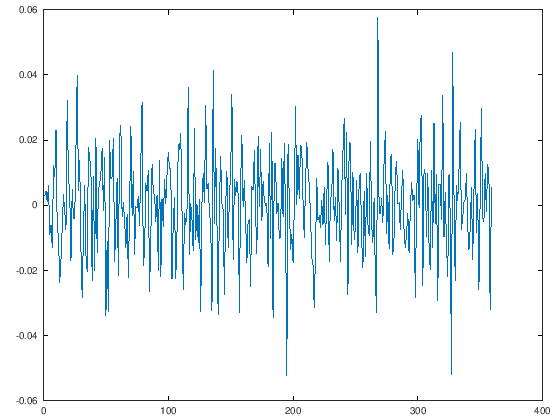

In [14]:
plot(irreg)

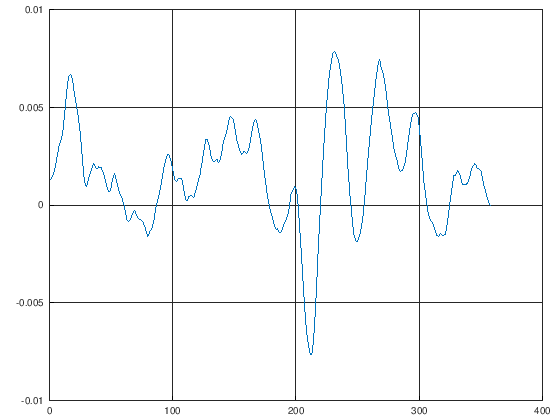

In [15]:
## diferencia de la tendencia
dtrend=diff(trend(:,1));
grid on
hold on
plot(dtrend(:,1))

In [16]:
## FIJANDO EL MODELO
[VAR2,P2,TVP2,oar]=autodhr(log_ipi,12,[],[24:45],PaP,TVPaP,1)
NVR2=VAR2(2:8)./VAR2(1)

VAR2 =

 Columns 1 through 6:

   5.1570e-04   3.0323e-07   1.7877e-06   1.2954e-06   1.8569e-06   4.1258e-06

 Columns 7 and 8:

   3.1619e-06   9.1615e-07

P2 =

       Inf   12.0000    6.0000    4.0000    3.0000    2.4000    2.0000

TVP2 =

   1   1   1   1   1   1   1
   1   0   0   0   0   0   0

oar = 43
NVR2 =

 Columns 1 through 6:

   5.8800e-04   3.4665e-03   2.5120e-03   3.6006e-03   8.0003e-03   6.1312e-03

 Column 7:

   1.7765e-03



In [17]:
[trend2,season2,cycle2,irreg2]=dhrfilt(log_ipi,P2,TVP2,VAR2,12,filt);

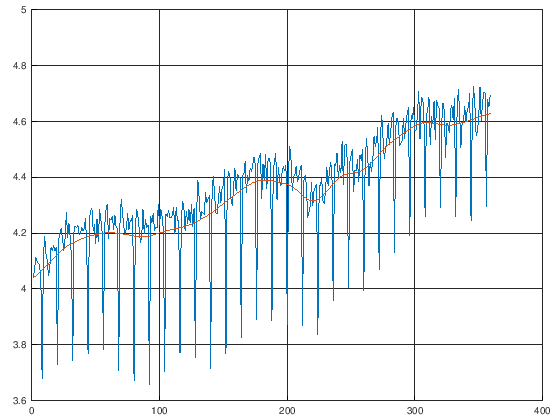

In [18]:
grid on
hold on
plot([log_ipi,trend2])

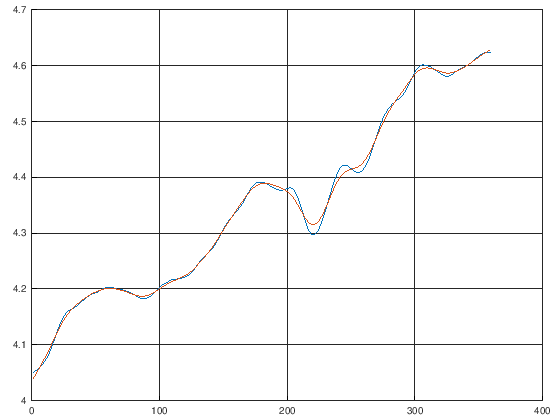

In [19]:
grid on
hold on
plot([trend(:,1),trend2])

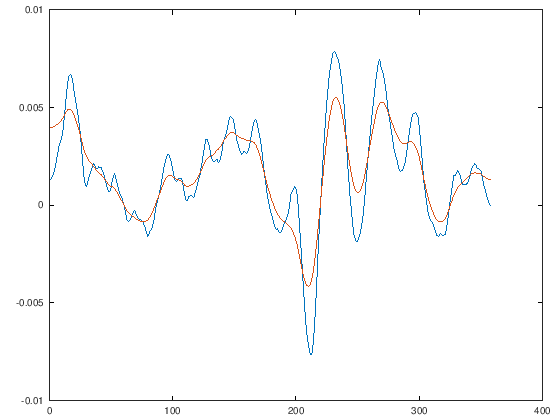

In [20]:
## diferencia de la tendencia
dtrend2=diff(trend2);
plot([dtrend(:,1),dtrend2])

In [21]:
## FORZANDO EL MODELO CON LOS PARAMETROS DE DECISION
[VAR3,P3,TVP3,oar3]=autodhr(log_ipi,12,[.1,.45,36,500,2],[],PaP,TVPaP)
#NVR3=VAR3(2:8)./VAR3(1)

VAR3 =

 Columns 1 through 6:

   4.1137e-04   1.0402e-07   1.6950e-07   2.1662e-06   3.3848e-06   6.5170e-06

 Columns 7 and 8:

   1.4527e-05   3.1710e-06

P3 =

       Inf   12.0000    6.0000    4.0000    3.0000    2.4000    2.0000

TVP3 =

   1   1   1   1   1   1   1
   1   0   0   0   0   0   0

oar3 = 34


In [22]:
## CON INFORMACION MINIMA
[VAR4,P4,TVP4,oar4]=autodhr(log_ipi,12)
#NVR4=VAR4(2:8)./VAR4(1)

VAR4 =

 Columns 1 through 6:

   5.1285e-04   3.4577e-07   8.5823e-07   3.6727e-08   2.9791e-06   4.9786e-06

 Columns 7 and 8:

   5.2153e-06   1.4846e-06

P4 =

       Inf   12.0000    6.0000    4.0000    3.0000    2.4000    2.0000

TVP4 =

   1.0000   1.0000   1.0000   1.0000   1.0000   1.0000   1.0000
   1.0000        0   0.8090        0        0        0        0

oar4 = 35


In [23]:
[trend4,season4,cycle4,irreg4]=dhrfilt(log_ipi,P4,TVP4,VAR4,12,filt);

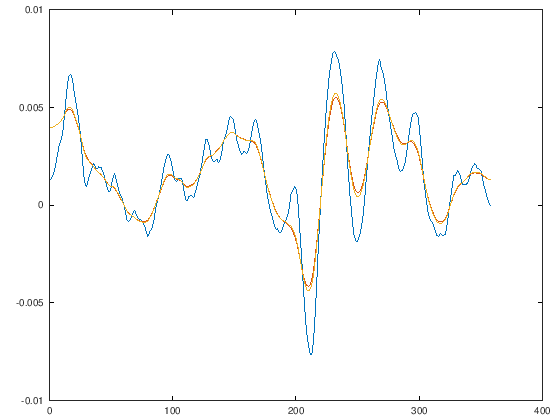

In [24]:
## diferencia de la tendencia
dtrend4=diff(trend4);
plot([dtrend,dtrend2,dtrend4])

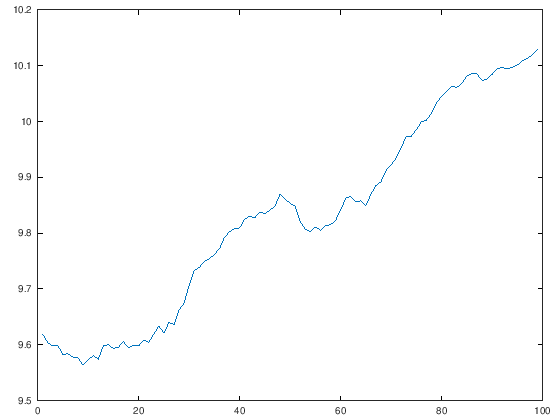

In [25]:
load vabindus.txt
log_vabindus=log(vabindus);
plot(log_vabindus)

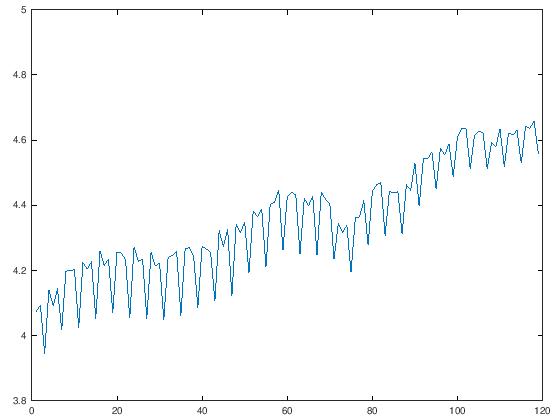

In [26]:
[logipi_trim] = acumula(log_ipi,3,0); %trimestralizacion del IPI
plot(logipi_trim)

In [27]:
## fijando el modelo
[VAR5,P5,TVP5,oar5]=autodhr(logipi_trim,4,[],[],[],[1 1;1 0],1)
[trend5,season5,cycle5,irreg5]=dhrfilt(logipi_trim,P5,TVP5,VAR5,4,filt);

VAR5 =

   9.5970e-05   4.6138e-06   3.7948e-06   3.1461e-06

P5 =

   Inf     4     2

TVP5 =

   1   1   1
   1   0   0

oar5 = 24


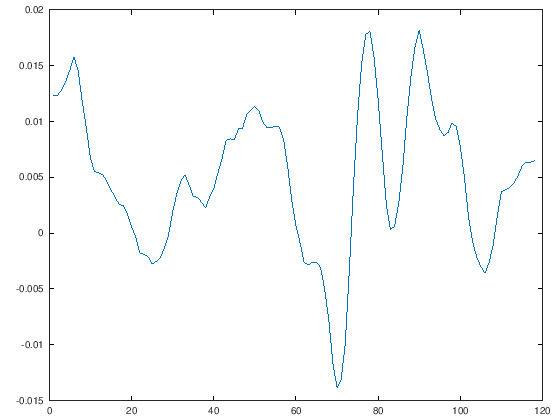

In [28]:
## diferencia de la tendencia
dtrend5=diff(trend5);
plot(dtrend5)

ans = -26.890


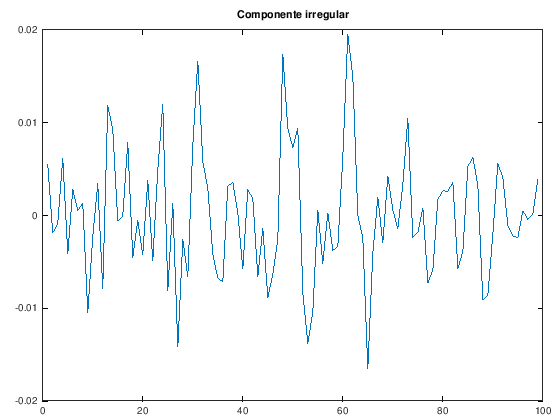

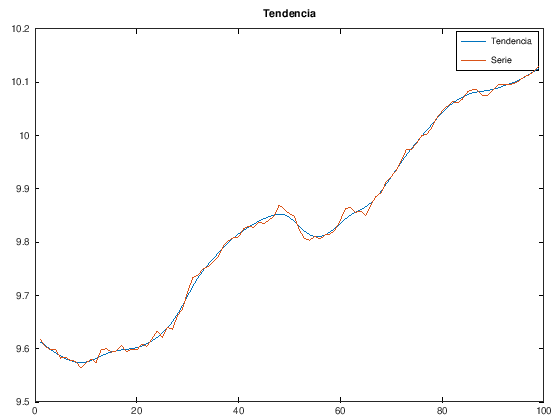

In [29]:
## filtando log(VABINDUS) con el modelo de temdemcia del log(IPI) 
[trend6,season6,cycle6,irreg6]=dhrfilt(log_vabindus,[Inf],[1;1],VAR5(1:2),4,filt,1);

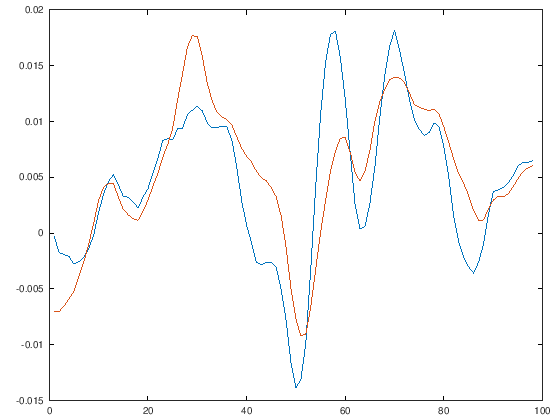

In [30]:
## diferencia de la tendencia
dtrend6=diff(trend6);
plot([dtrend5(21:118) dtrend6])

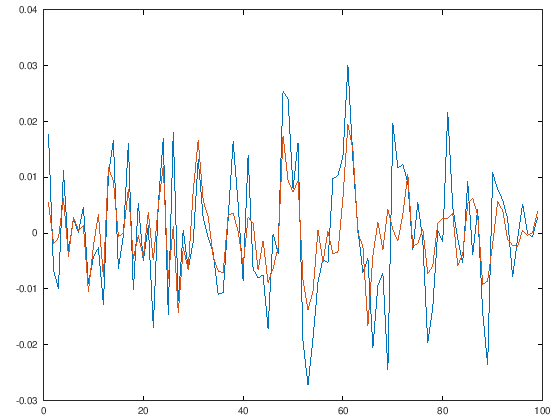

In [31]:
plot([irreg5(21:119), irreg6])

VAR7 =

   1.2193e-04   1.4162e-05   5.6987e-06   2.7896e-06

P7 =

   Inf     4     2

TVP7 =

   1.0000   1.0000   1.0000
   0.8936        0        0

oar7 = 25
ans = -14.375


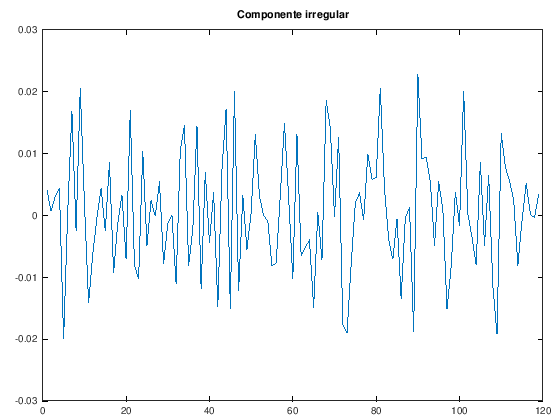

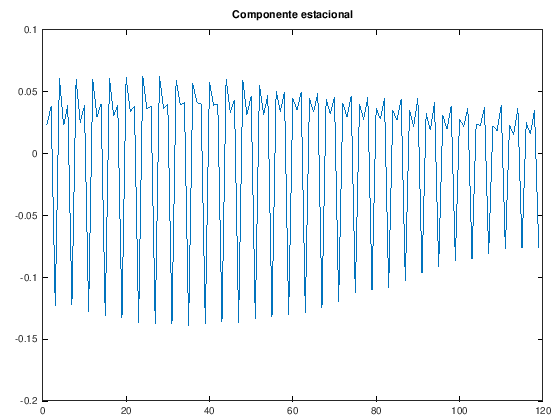

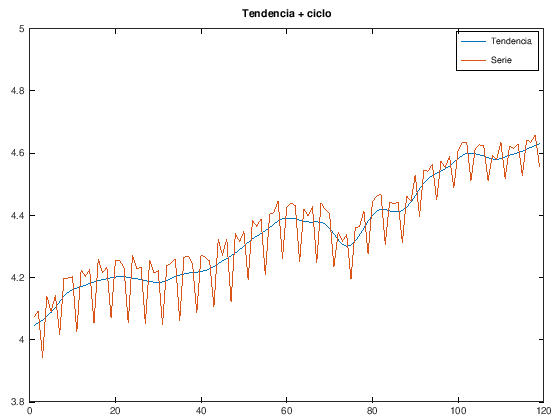

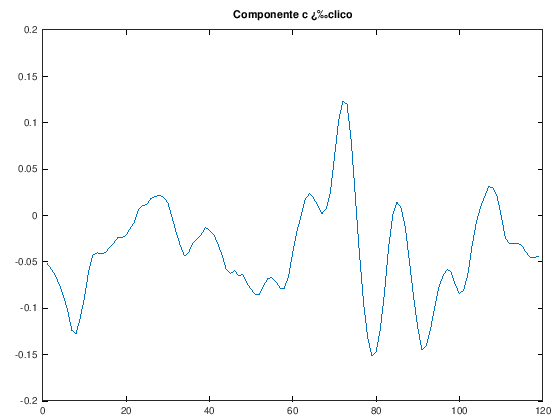

In [32]:
[VAR7,P7,TVP7,oar7]=autodhr(logipi_trim,4,[],25)
[trend7,season7,cycle7,irreg7]=dhrfilt(logipi_trim,P7,TVP7,VAR7,4,filt,1);

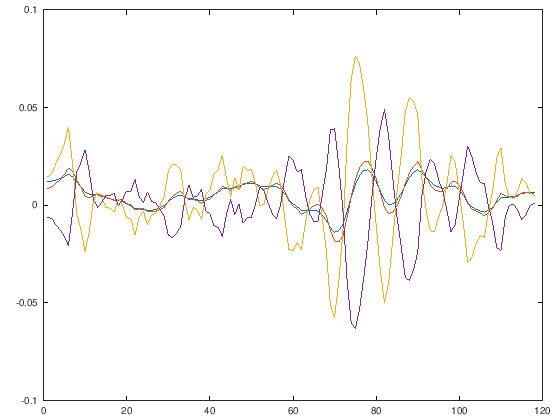

In [33]:
dtrend7=diff(trend7);
plot([dtrend5,dtrend7])

ans = -20.830
error: horizontal dimensions mismatch (1x98 vs 98x3)


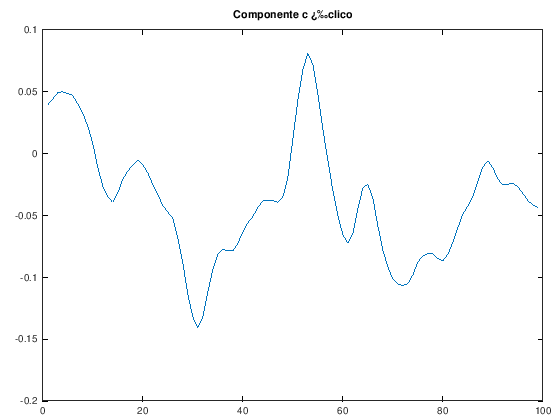

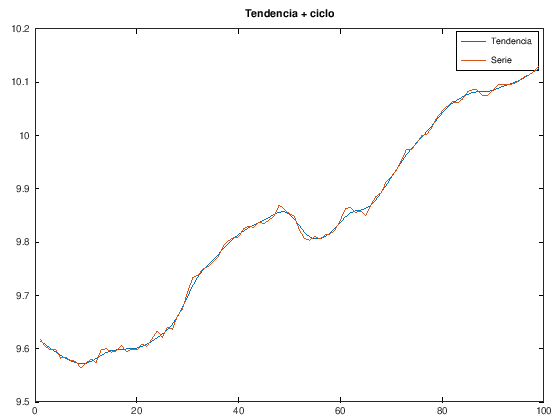

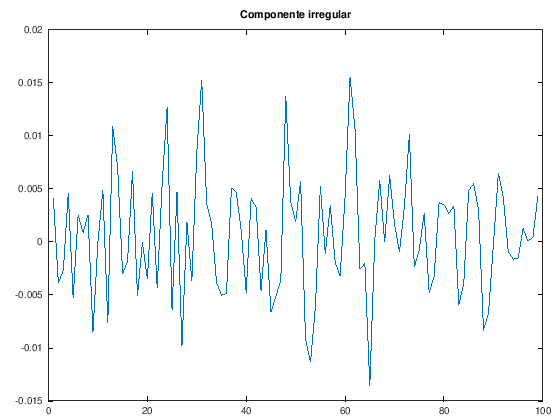

In [34]:
[trend8,season8,cycle8,irreg8]=dhrfilt(log_vabindus,P7(1),TVP7(:,1),VAR7(1:2),4,filt,1);
dtrend8=diff(trend8);
plot([dtrend7(21:118) dtrend8])

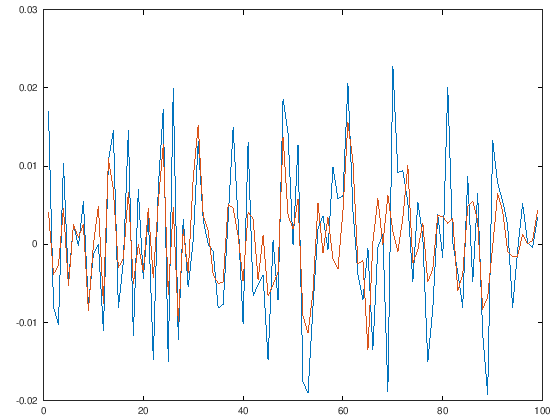

In [35]:
plot([irreg7(21:119), irreg8])